#**Trabalho 4 - Inteligência Artificial**

#**Grupo**

Nome: Jhon Wislin Ribeiro Citron - RA: 776852

Nome: Vinícius Melo da Silva - RA: 769722

Escolha do conjunto de dados a ser utilizado, no caso, foi escolhido a classificação de medicamentos a partir da seguinte base de dados: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

#**Objetivo:**

Encontrar o melhor número de grupos para o algoritmo kmeans usando o método do cotovelo. Abaixo são apresentadas as bibliotecas definidas para a resolução desse problema.

**Bibliotecas**:

In [81]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm

Abaixo, é feita a leitura do arquivo .csv através da função pd.read_csv, e apresentação da base de dados utilizando a função head, que apresenta as 5 primeiras linhas.

In [82]:
ConjDados = pd.read_csv("drug200.csv")
ConjDados.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Com a função drop é feita a remoção da classe "Drug" do conjunto de dados que vai ser trabalhado, dando origem ao conjunto de dados X sem a classe "Drug". Como pode ser observado abaixo.

In [83]:
X = ConjDados.drop("Drug", axis=1)

Abaixo, é feita a utilização da função pd.get_dummies para transformar os atributos do conjunto de dados X que forem nominais, para atributos binários.

In [84]:
X = pd.get_dummies(X)

Em seguida, é feita a normalização dos atributos do conjunto de dados X. A função fit(X) faz o ajuste dos dados em X, e a transformação do conjunto de dados é feita método transform() em mms.transform(X), normalizando os dados. Como mostrado abaixo.

In [85]:
mms = MinMaxScaler()
mms.fit(X)
X_Norm = mms.transform(X)

Criação de intervalo de 1 a 15 com a função range.

In [86]:
K = range(1, 15)

Abaixo, é aplicado o algoritmo de KMeans sobre o conjunto de dados X_Norm (Conjunto sem a classe "Drug" normalizado) para o intervalo K. Assim, sendo feito o agrupamento para cada quantidade de grupo no intervalo definido em K. A coleta dos índices das somas quadráticas é feita em soma_das_distancias.append(km.inertia_), onde soma_das_distancias recebe esses índices.

In [87]:
soma_das_distancias = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_Norm)
    soma_das_distancias.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Abaixo, é feita a plotagem do gráfico dos índices em relação a cada número de grupos. A função plt.show() é responsável por apresentar o gráfico. Ao analisarmos os resultados obtidos no gráfico, é possível determinar que o ponto ótimo de clusters é 4, dado que a partir de 4, a adição de mais clusters não resulta em uma redução significativa na soma das distâncias.

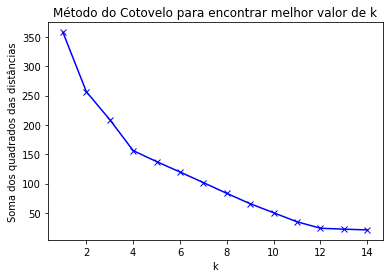

In [88]:
plt.plot(K, soma_das_distancias, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()